Parseamos y estandarizamos los datos de los países de europa

In [1]:
from utils.file_utils import parse_countries_data, standarize_data
attributes, countries, dataset = parse_countries_data("ex_1/resources/europe.csv")
std = standarize_data(dataset)

In [2]:
import networks.kohonen as kohonen
import numpy as np
output_dimension = int(np.floor(np.sqrt(std.shape[0]*0.5)))
kohonen_network = kohonen.KohonenNetwork(std.shape[1], output_dimension, 1)
e, groups = kohonen_network.train(std, countries, 1000)
print(groups)

[[['Switzerland'], ['Bulgaria', 'Latvia', 'Estonia'], ['Ukraine']], [['Luxembourg'], ['Iceland', 'Denmark', 'Netherlands', 'Austria', 'Ireland', 'Belgium'], ['Slovakia', 'Czech Republic', 'Croatia', 'Portugal', 'Poland', 'Hungary', 'Lithuania', 'Slovenia']], [['Spain'], ['Norway', 'Sweden', 'Germany', 'United Kingdom', 'Finland', 'Italy'], ['Greece']]]


[['Switzerland', 'Bulgaria,Latvia,Estonia', 'Ukraine'], ['Luxembourg', 'Iceland,Denmark,Netherlands,Austria,Ireland,Belgium', 'Slovakia,Czech Republic,Croatia,Portugal,Poland,Hungary,Lithuania,Slovenia'], ['Spain', 'Norway,Sweden,Germany,United Kingdom,Finland,Italy', 'Greece']]


<AxesSubplot:>

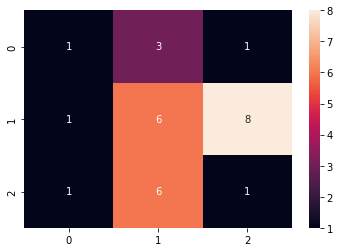

In [3]:
import seaborn as sns
heatmap_data = np.zeros((output_dimension, output_dimension))
heatmap_annot = []
for i in range(output_dimension):
    row = []
    for j in range(output_dimension):
        heatmap_data[i][j] = len(groups[i][j])
        row.append( ','.join(groups[i][j]))
    heatmap_annot.append(row)
print(heatmap_annot)
sns.heatmap(heatmap_data, annot=True)